# Install Library

In [1]:
!pip install mediapipe opencv-python

## Import Libraries

In [5]:
import mediapipe as mp
import cv2
import numpy as np
import uuid 
import os
import matplotlib.pyplot as plt

2023-03-25 00:20:39.172816: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define Detectors from Mediapipe

In [6]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

### Visualize Hands (No Readings)

In [4]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
            
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

### Test Hand Recognition and save images

In [5]:
os.mkdir("Output Images")

In [6]:
# Implement Same Code but Add Saving Images
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.6) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
            
        # Save the image    
        cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

### Detect Hand Label (Left Or Right)

In [11]:
def get_label(index, hand, results):
    output = None
    for idx, classification in enumerate(results.multi_handedness):
        if classification.classification[0].index == index:
            
            # Process results
            label = classification.classification[0].label
            score = classification.classification[0].score
            text = '{} {}'.format(label, round(score, 2))
            
            # Extract Coordinates
            coords = tuple(np.multiply(
                np.array((hand.landmark[mp_hands.HandLandmark.WRIST].x, hand.landmark[mp_hands.HandLandmark.WRIST].y)),
            [1280,720]).astype(int))
            
            output = text, coords
            
    return output

In [4]:
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        # Save image    
        cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

### Show Angle of each finger based on Joints 

![Joint Using Mediapipe](Hand-Joint-PinPoints.png)

In [8]:
# Get the Joint List based on the List That is on the top image
joint_list = [[4,3,2], [8,7,6] , [12,11,10] , [16,15,14] , [20,19,18]]

In [12]:
def draw_finger_angles(image, results, joint_list):
    
    # Loop through hands
    for hand in results.multi_hand_landmarks:
        #Loop through joint sets 
        for joint in joint_list:
            a = np.array([hand.landmark[joint[0]].x, hand.landmark[joint[0]].y]) # First coord
            b = np.array([hand.landmark[joint[1]].x, hand.landmark[joint[1]].y]) # Second coord
            c = np.array([hand.landmark[joint[2]].x, hand.landmark[joint[2]].y]) # Third coord
            
            radians = np.arctan2(c[1] - b[1], c[0]-b[0]) - np.arctan2(a[1]-b[1], a[0]-b[0])
            angle = np.abs(radians*180.0/np.pi)
            
            if angle > 180.0:
                angle = 360-angle
                
            cv2.putText(image, str(round(angle, 2)), tuple(np.multiply(b, [1280,720]).astype(int)),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 2, cv2.LINE_AA)
    return image

In [13]:
# Implement Video with the angles
cap = cv2.VideoCapture(0)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.5) as hands: 
    while cap.isOpened():
        ret, frame = cap.read()
        
        # BGR 2 RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        
        # Flip on horizontal
        image = cv2.flip(image, 1)
        
        # Set flag
        image.flags.writeable = False
        
        # Detections
        results = hands.process(image)
        
        # Set flag to true
        image.flags.writeable = True
        
        # RGB 2 BGR
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Detections
        print(results)
        
        # Rendering results
        if results.multi_hand_landmarks:
            for num, hand in enumerate(results.multi_hand_landmarks):
                mp_drawing.draw_landmarks(image, hand, mp_hands.HAND_CONNECTIONS, 
                                        mp_drawing.DrawingSpec(color=(121, 22, 76), thickness=2, circle_radius=4),
                                        mp_drawing.DrawingSpec(color=(250, 44, 250), thickness=2, circle_radius=2),
                                         )
                if get_label(num, hand, results):
                    text, coord = get_label(num, hand, results)
                    cv2.putText(image, text, coord, cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
            draw_finger_angles(image,results, joint_list)
        # Save image    
        #cv2.imwrite(os.path.join('Output Images', '{}.jpg'.format(uuid.uuid1())), image)
        cv2.imshow('Hand Tracking', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

cap.release()
cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [14]:
results.multi_hand_landmarks

[landmark {
   x: 0.28786277770996094
   y: 0.7431685328483582
   z: 3.1900637509352237e-07
 }
 landmark {
   x: 0.33926522731781006
   y: 0.6964243650436401
   z: -0.019327623769640923
 }
 landmark {
   x: 0.3752073049545288
   y: 0.6203853487968445
   z: -0.02642609365284443
 }
 landmark {
   x: 0.3963581323623657
   y: 0.5502259135246277
   z: -0.03242595121264458
 }
 landmark {
   x: 0.4115772545337677
   y: 0.4959797263145447
   z: -0.03803325071930885
 }
 landmark {
   x: 0.3315567672252655
   y: 0.4957548677921295
   z: -0.01258133351802826
 }
 landmark {
   x: 0.3428182303905487
   y: 0.3992322087287903
   z: -0.023744037374854088
 }
 landmark {
   x: 0.34651291370391846
   y: 0.33970576524734497
   z: -0.03398149460554123
 }
 landmark {
   x: 0.3471753001213074
   y: 0.2892879247665405
   z: -0.04184812307357788
 }
 landmark {
   x: 0.2982078492641449
   y: 0.48941004276275635
   z: -0.013683794066309929
 }
 landmark {
   x: 0.3004755973815918
   y: 0.38309213519096375
   z: -

In [15]:
test_image = draw_finger_angles(image, results, joint_list)

In [16]:
test_image

array([[[155, 182, 216],
        [157, 183, 217],
        [158, 183, 217],
        ...,
        [136, 164, 200],
        [138, 164, 200],
        [138, 164, 200]],

       [[155, 182, 216],
        [155, 182, 216],
        [157, 183, 217],
        ...,
        [135, 164, 200],
        [135, 163, 200],
        [134, 162, 198]],

       [[153, 182, 216],
        [154, 182, 216],
        [156, 183, 217],
        ...,
        [132, 163, 200],
        [131, 162, 199],
        [130, 160, 198]],

       ...,

       [[115, 130, 159],
        [114, 129, 158],
        [113, 127, 157],
        ...,
        [ 95, 120, 150],
        [ 97, 121, 151],
        [ 98, 122, 153]],

       [[116, 131, 160],
        [115, 130, 159],
        [114, 129, 158],
        ...,
        [ 94, 120, 150],
        [ 97, 123, 153],
        [ 99, 125, 155]],

       [[116, 131, 160],
        [115, 130, 159],
        [114, 129, 158],
        ...,
        [ 95, 122, 151],
        [ 98, 124, 154],
        [ 99, 125, 155]]

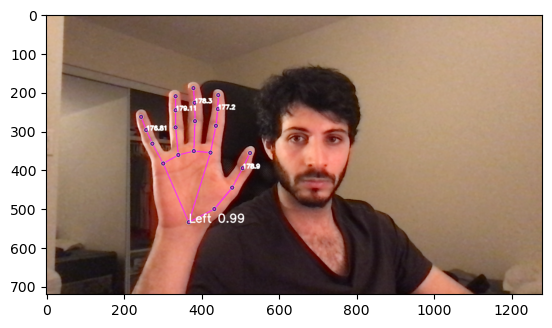

In [17]:
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.show()